In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import plotly.express as px

In [ ]:
import pandas as pd
Price = pd.read_csv('/content/drive/MyDrive/Midterm Project CoderSchool- Nam Nguyen/calendar.csv')
Listing = pd.read_csv('/content/drive/MyDrive/Midterm Project CoderSchool- Nam Nguyen/listings.csv')
Reviews = pd.read_csv('/content/drive/MyDrive/Midterm Project CoderSchool- Nam Nguyen/reviews.csv')

#Exploring Data

In [ ]:
Price 

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2022-09-13,t,$99.00,$99.00,2.0,90.0
1,5456,2022-09-14,f,$125.00,$125.00,2.0,90.0
2,5456,2022-09-15,f,$125.00,$125.00,2.0,90.0
3,5456,2022-09-16,f,$200.00,$200.00,2.0,90.0
4,5456,2022-09-17,f,$200.00,$200.00,2.0,90.0
...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,"$2,200.00","$2,200.00",2.0,1125.0
6692280,319759,2023-09-09,t,"$2,200.00","$2,200.00",2.0,1125.0
6692281,319759,2023-09-10,t,$676.00,$676.00,1.0,1125.0
6692282,319759,2023-09-11,t,$513.00,$513.00,1.0,1125.0


In [ ]:
Reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,319887,11019466,2014-03-17,1342637,Louis,"Great house to stay in Austin. Its clean, comf..."
2,319887,28127764,2015-03-18,705404,Matt,This was a perfect crash pad for SXSW week. It...
3,46856014,716545198,2020-12-19,64832066,Ryan,Really enjoyed staying at this place. So quiet...
4,46856014,719745409,2020-12-30,59487866,Becky,Great location. Beautiful property. Niza is an...
...,...,...,...,...,...,...
649229,51927594,657925119657605330,2022-06-26,334412694,Chandler,"Great hosts, wonderful house, and an all aroun..."
649230,51927594,663728857613482071,2022-07-04,136040033,Natalia,We loved our stay! The place had everything we...
649231,51927594,684036729303978601,2022-08-01,392776420,Rebecca,a most excellent experience! one of our BEST ...
649232,692290837388019951,702856108305773659,2022-08-27,162975958,Joel,Beautiful cozy spot outside of Austin. There's...


In [ ]:
Listing

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20220912200151,2022-09-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.81,4.74,4.79,NaN,f,1,1,0,0,3.73
1,5769,https://www.airbnb.com/rooms/5769,20220912200151,2022-09-13,city scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.75,4.92,NaN,f,1,0,1,0,1.78
2,46856014,https://www.airbnb.com/rooms/46856014,20220912200151,2022-09-12,city scrape,"Electric Fireplace+Fire Pit, Lake Fishing + ka...",Quiet evenings with a beautiful view of the la...,"Starbucks, Shopping center, Grocery Store, Dol...",https://a0.muscache.com/pictures/13ec989b-f3b6...,375760981,...,4.97,4.83,4.77,NaN,t,1,1,0,0,4.17
3,319887,https://www.airbnb.com/rooms/319887,20220912200151,2022-09-13,previous scrape,Quaint East Austin 2BR SXSW 2016,Awesome house in the middle of downtown action...,The neighborhood is the first sub-division in ...,https://a0.muscache.com/pictures/31764696/dbae...,1640158,...,5.00,4.00,4.00,NaN,f,1,1,0,0,0.02
4,319894,https://www.airbnb.com/rooms/319894,20220912200151,2022-09-13,city scrape,The Perfect Austin Modern Home,The home is a 2300 square foot modern style 3 ...,Everyone who lives in Agave - LOVES Agave. It'...,https://a0.muscache.com/pictures/200398af-d3b2...,1640172,...,4.98,4.82,4.88,NaN,f,2,1,1,0,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18332,19325414,https://www.airbnb.com/rooms/19325414,20220912200151,2022-09-13,city scrape,Luxurious Marble Falls Condo - 1 bedroom/1bath...,This is a one bedroom one bathroom condo. It i...,Popular Attractions<br />Flat Creek Winery<br ...,https://a0.muscache.com/pictures/miso/Hosting-...,100605868,...,5.00,4.87,4.67,NaN,f,22,22,0,0,0.26
18333,14359515,https://www.airbnb.com/rooms/14359515,20220912200151,2022-09-13,city scrape,"Marble Falls, TX, *2-Bedroom SN #1",I can accept a 1-night stay for a weekend nigh...,Break away from everyday life and retreat to c...,https://a0.muscache.com/pictures/9ac4fcc5-d140...,10981379,...,5.00,4.71,4.82,NaN,f,57,57,0,0,0.24
18334,19905275,https://www.airbnb.com/rooms/19905275,20220912200151,2022-09-13,city scrape,Luxurious Marble Falls Condo -3bed/2bath,This is a 3 bedroom 2 bathroom condo. It is eq...,Popular Attractions<br />Flat Creek Winery<br ...,https://a0.muscache.com/pictures/miso/Hosting-...,100605868,...,5.00,4.83,4.75,NaN,f,22,22,0,0,0.20
18335,30589642,https://www.airbnb.com/rooms/30589642,20220912200151,2022-09-13,city scrape,"Marble Falls, TX, *1-Bedroom Presidential Z #1",I can accept a 1-night stay for a weekend nigh...,Break away from everyday life and retreat to c...,https://a0.muscache.com/pictures/17a0d354-f52d...,10981379,...,NaN,NaN,NaN,NaN,f,57,57,0,0,NaN


In [ ]:
Listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18337 entries, 0 to 18336
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18337 non-null  int64  
 1   listing_url                                   18337 non-null  object 
 2   scrape_id                                     18337 non-null  int64  
 3   last_scraped                                  18337 non-null  object 
 4   source                                        18337 non-null  object 
 5   name                                          18337 non-null  object 
 6   description                                   18153 non-null  object 
 7   neighborhood_overview                         10941 non-null  object 
 8   picture_url                                   18336 non-null  object 
 9   host_id                                       18337 non-null 

In [ ]:
Price[Price.duplicated(subset=['listing_id'])]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,5456,2022-09-14,f,$125.00,$125.00,2.0,90.0
2,5456,2022-09-15,f,$125.00,$125.00,2.0,90.0
3,5456,2022-09-16,f,$200.00,$200.00,2.0,90.0
4,5456,2022-09-17,f,$200.00,$200.00,2.0,90.0
5,5456,2022-09-18,t,$115.00,$115.00,2.0,90.0
...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,"$2,200.00","$2,200.00",2.0,1125.0
6692280,319759,2023-09-09,t,"$2,200.00","$2,200.00",2.0,1125.0
6692281,319759,2023-09-10,t,$676.00,$676.00,1.0,1125.0
6692282,319759,2023-09-11,t,$513.00,$513.00,1.0,1125.0


#Check for null data


In [ ]:
Price.isna().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    1
maximum_nights    1
dtype: int64

In [ ]:
Listing.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3403
Length: 75, dtype: int64

In [ ]:
Reviews.isna().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         169
dtype: int64

#Dropping unnecessary columns and joining data


In [ ]:
Listing.drop(columns= Listing.loc[:,'listing_url':'host_identity_verified'], inplace = True)
Listing.drop(columns = Listing.loc[:,'neighbourhood_cleansed': 'neighbourhood_group_cleansed'], inplace = True)
Listing.drop(columns = Listing.loc[:,'property_type': 'last_review'], inplace = True) 
Listing.drop(columns = Listing.loc[:,'license':'calculated_host_listings_count_shared_rooms'],inplace = True)
Listing

,id,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5769,"Austin, Texas, United States",30.45697,-97.78422,4.90,4.90,4.86,4.91,4.94,4.75,4.92,1.78
2,46856014,"Burnet, Texas, United States",30.80862,-98.37400,4.85,4.84,4.80,4.93,4.97,4.83,4.77,4.17
3,319887,"Austin, Texas, United States",30.25328,-97.72968,4.50,4.50,3.50,4.50,5.00,4.00,4.00,0.02
4,319894,"Austin, Texas, United States",30.28354,-97.64966,4.84,4.90,4.73,4.98,4.98,4.82,4.88,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...
18332,19325414,"Marble Falls, Texas, United States",30.55294,-98.28544,4.88,4.94,4.88,4.67,5.00,4.87,4.67,0.26
18333,14359515,"Marble Falls, Texas, United States",30.55161,-98.28574,4.88,4.94,5.00,4.59,5.00,4.71,4.82,0.24
18334,19905275,"Marble Falls, Texas, United States",30.55294,-98.28544,5.00,5.00,4.92,4.83,5.00,4.83,4.75,0.20
18335,30589642,"Marble Falls, Texas, United States",30.55294,-98.28544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Listing.isna().sum()

id                                0
neighbourhood                  7396
latitude                          0
longitude                         0
review_scores_rating           3403
review_scores_accuracy         3470
review_scores_cleanliness      3470
review_scores_checkin          3471
review_scores_communication    3471
review_scores_location         3472
review_scores_value            3472
reviews_per_month              3403
dtype: int64

In [ ]:
Listing.rename(columns={'id':'listing_id'},inplace=True)


In [ ]:
Processed_data = Price.join(Listing.set_index('listing_id'),on= 'listing_id')

In [ ]:
Processed_data.shape

(6692284, 18)

#Check for null data again


In [ ]:
Processed_data1 = Processed_data.copy()
Processed_data1.drop(columns= ['neighbourhood'], inplace = True)
Processed_data1

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,$99.00,$99.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,$125.00,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,$125.00,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,$200.00,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,$200.00,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,"$2,200.00","$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,"$2,200.00","$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,$676.00,$676.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,$513.00,$513.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


In [ ]:
Processed_data.isna().sum()

listing_id                           0
date                                 0
available                            0
price                                0
adjusted_price                       0
minimum_nights                       1
maximum_nights                       1
neighbourhood                  2699175
latitude                             0
longitude                            0
review_scores_rating           1241730
review_scores_accuracy         1266185
review_scores_cleanliness      1266185
review_scores_checkin          1266550
review_scores_communication    1266550
review_scores_location         1266915
review_scores_value            1266915
reviews_per_month              1241730
dtype: int64

In [ ]:
Processed_data1.dropna(inplace=True)
Processed_data1

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,$99.00,$99.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,$125.00,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,$125.00,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,$200.00,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,$200.00,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,"$2,200.00","$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,"$2,200.00","$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,$676.00,$676.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,$513.00,$513.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


In [ ]:
Processed_data.dropna(inplace=True)
Processed_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,$99.00,$99.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,$125.00,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,$125.00,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,$200.00,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,$200.00,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,"$2,200.00","$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,"$2,200.00","$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,$676.00,$676.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,$513.00,$513.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


#Calculate average price for each id and reformat data

In [ ]:
def removing(data):  
  return data['price'].strip("$").replace(',','')
Processed_data['price'] = Processed_data.apply(removing,axis=1)
Processed_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,99.00,$99.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,125.00,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,125.00,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,200.00,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,200.00,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,2200.00,"$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,2200.00,"$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,676.00,$676.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,513.00,$513.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


In [ ]:
Processed_data1['price'] = Processed_data1.apply(removing,axis=1)
Processed_data1

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,99.00,$99.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,125.00,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,125.00,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,200.00,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,200.00,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,2200.00,"$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,2200.00,"$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,676.00,$676.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,513.00,$513.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


In [ ]:
Processed_data['price'] = Processed_data['price'].astype(float)
Processed_data1['price'] = Processed_data1['price'].astype(float)

In [ ]:
Processed_data['date'] = Processed_data['date'].str.replace('-','')
Processed_data['date'] = pd.to_datetime(Processed_data['date'], format='%Y%m%d')
Processed_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,99.0,$99.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,125.0,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,125.0,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,200.0,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,200.0,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,2200.0,"$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,2200.0,"$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,676.0,$676.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,513.0,$513.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


In [ ]:
Processed_data1['date'] = Processed_data1['date'].str.replace('-','')
Processed_data1['date'] = pd.to_datetime(Processed_data1['date'], format='%Y%m%d')
Processed_data1

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,5456,2022-09-13,t,99.0,$99.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
1,5456,2022-09-14,f,125.0,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
2,5456,2022-09-15,f,125.0,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
3,5456,2022-09-16,f,200.0,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
4,5456,2022-09-17,f,200.0,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,2200.0,"$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692280,319759,2023-09-09,t,2200.0,"$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692281,319759,2023-09-10,t,676.0,$676.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17
6692282,319759,2023-09-11,t,513.0,$513.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17


In [ ]:
Processed_data["average_price"] = Processed_data.groupby("listing_id")["price"].transform("mean")
Processed_data

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,average_price
0,5456,2022-09-13,t,99.0,$99.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
1,5456,2022-09-14,f,125.0,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
2,5456,2022-09-15,f,125.0,$125.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
3,5456,2022-09-16,f,200.0,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
4,5456,2022-09-17,f,200.0,$200.00,2.0,90.0,"Austin, Texas, United States",30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,2200.0,"$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205
6692280,319759,2023-09-09,t,2200.0,"$2,200.00",2.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205
6692281,319759,2023-09-10,t,676.0,$676.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205
6692282,319759,2023-09-11,t,513.0,$513.00,1.0,1125.0,"Austin, Texas, United States",30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205


In [ ]:
Processed_data1["average_price"] = Processed_data1.groupby("listing_id")["price"].transform("mean")
Processed_data1

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,average_price
0,5456,2022-09-13,t,99.0,$99.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
1,5456,2022-09-14,f,125.0,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
2,5456,2022-09-15,f,125.0,$125.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
3,5456,2022-09-16,f,200.0,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
4,5456,2022-09-17,f,200.0,$200.00,2.0,90.0,30.26057,-97.73441,4.84,4.87,4.85,4.89,4.81,4.74,4.79,3.73,138.183562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6692279,319759,2023-09-08,t,2200.0,"$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205
6692280,319759,2023-09-09,t,2200.0,"$2,200.00",2.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205
6692281,319759,2023-09-10,t,676.0,$676.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205
6692282,319759,2023-09-11,t,513.0,$513.00,1.0,1125.0,30.26585,-97.73328,4.89,4.87,4.79,4.95,4.95,4.81,4.72,2.17,943.545205


### Window Function (Extra)

```
# copy dataframe to avoid overwritting original (optional)
analysis1 = Processed_data.copy()

# add new column
analysis1["price"] = analysis1.groupby("listing_id")["price"].transform("mean")

analysis1
```



In [ ]:
Processed_data['neighbourhood'].nunique()

100

#**Analyzing Data**

#Main Hypothesis: Price vs Quality 

####Does high price means better quality? Does lower price means more demand?

Average price for each ID

In [ ]:
analysis1 = Processed_data1.groupby('listing_id')[['average_price','review_scores_rating','reviews_per_month']].mean()
analysis1.reset_index()
analysis1.to_csv('analysis1.csv')


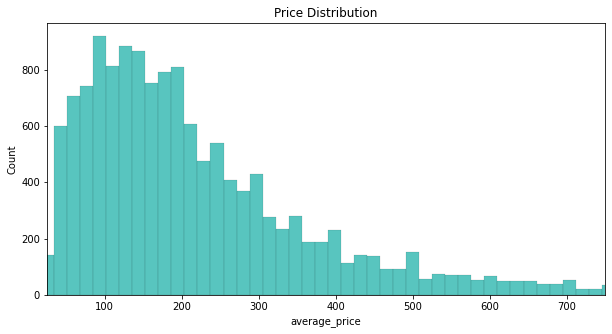

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= analysis1, x= 'average_price',color = 'lightseagreen') 
plt.xlim(25,750)
plt.title('Price Distribution')
plt.show()


Reviews per months and rating score for the quality

In [ ]:
analysis1.describe()

,average_price,review_scores_rating,reviews_per_month
count,14864.000000,14864.000000,14864.000000
mean,419.855831,4.806752,1.673300
std,1174.889912,0.368590,1.783343
min,0.000000,0.000000,0.010000
25%,114.534247,4.760000,0.377500
50%,191.126027,4.920000,1.100000
75%,323.001370,5.000000,2.390000
max,10000.000000,5.000000,35.180000


In [ ]:
analysis1.loc[(analysis1['review_scores_rating'] < 4.76) | (analysis1['reviews_per_month'] < 2.39),"Quality"] = "Bad"
analysis1.loc[(analysis1['review_scores_rating']>= 4.76) & (analysis1['reviews_per_month'] >=2.39),"Quality"] = "Good"
analysis1.drop_duplicates(inplace=True)
analysis1

,average_price,review_scores_rating,reviews_per_month,Quality
listing_id,,,,
5456,138.183562,4.84,3.73,Good
5769,41.216438,4.90,1.78,Bad
6413,106.682192,4.97,0.77,Bad
6448,158.487671,4.97,2.15,Bad
8502,45.054795,4.53,0.31,Bad
...,...,...,...,...
709600753986146909,151.745205,4.50,2.00,Bad
710005655946640822,102.136986,5.00,1.00,Bad
710064352754503134,136.715068,5.00,1.00,Bad


Average Price Vs Rating (Raw)

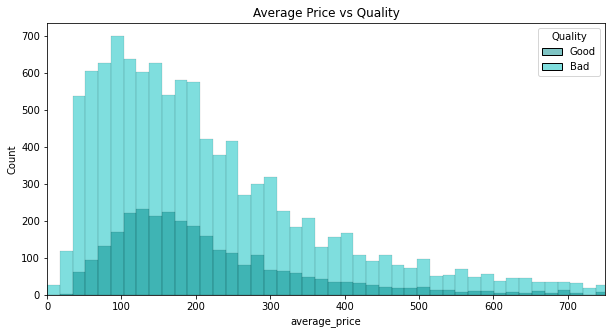

In [ ]:
palette = {'Good': 'darkcyan', 'Bad': 'c'}
plt.figure(figsize=(10,5))
sns.histplot(data= analysis1, x= 'average_price', hue = 'Quality', palette = palette) 
plt.xlim(0,750)
plt.title('Average Price vs Quality')
plt.show()

**From this graph, we can conclude that quality (rating) doesn't correlate with price level **

**Price Distribution and Categorizing**

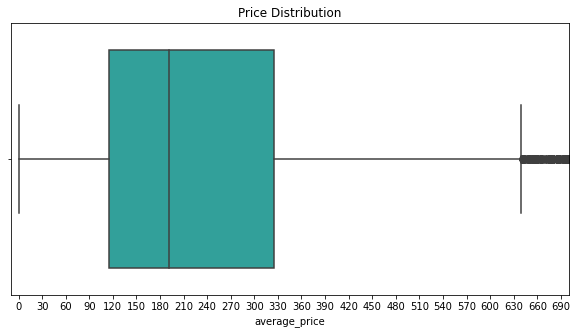

In [ ]:
plt.figure(figsize=(10,5))

sns.boxplot(data=analysis1, x = 'average_price',color = 'lightseagreen')

x = np.arange(0, 1000, 30)
plt.xticks (x)

plt.xlim(-10,700)

plt.title('Price Distribution')
plt.show()

In [ ]:
analysis1.describe()

,average_price,review_scores_rating,reviews_per_month
count,14570.000000,14570.000000,14570.000000
mean,422.546792,4.803756,1.703733
std,1180.485471,0.370685,1.787318
min,0.000000,0.000000,0.010000
25%,115.000000,4.750000,0.410000
50%,191.445205,4.920000,1.140000
75%,324.547260,5.000000,2.430000
max,10000.000000,5.000000,35.180000


In [ ]:
analysis1

,average_price,review_scores_rating,reviews_per_month,Quality
listing_id,,,,
5456,138.183562,4.84,3.73,Good
5769,41.216438,4.90,1.78,Bad
6413,106.682192,4.97,0.77,Bad
6448,158.487671,4.97,2.15,Bad
8502,45.054795,4.53,0.31,Bad
...,...,...,...,...
709600753986146909,151.745205,4.50,2.00,Bad
710005655946640822,102.136986,5.00,1.00,Bad
710064352754503134,136.715068,5.00,1.00,Bad


From the boxplot above, we can categorize price level into 4 categories


In [ ]:
analysis1.loc[analysis1['average_price']<=114,"Category"] = "Very Cheap"
analysis1.loc[(analysis1['average_price']<= 191) & (analysis1['average_price'] >114), "Category"] = "Cheap"
analysis1.loc[(analysis1['average_price']<= 323) & (analysis1['average_price'] >191), "Category"] = "Affordable"
analysis1.loc[analysis1['average_price']> 323,"Category"] = "Expensive"
analysis1

,average_price,review_scores_rating,reviews_per_month,Quality,Category
listing_id,,,,,
5456,138.183562,4.84,3.73,Good,Cheap
5769,41.216438,4.90,1.78,Bad,Very Cheap
6413,106.682192,4.97,0.77,Bad,Very Cheap
6448,158.487671,4.97,2.15,Bad,Cheap
8502,45.054795,4.53,0.31,Bad,Very Cheap
...,...,...,...,...,...
709600753986146909,151.745205,4.50,2.00,Bad,Cheap
710005655946640822,102.136986,5.00,1.00,Bad,Very Cheap
710064352754503134,136.715068,5.00,1.00,Bad,Cheap


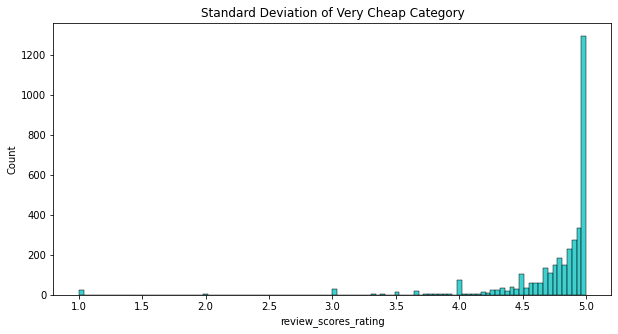

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= analysis1[analysis1["Category"] == 'Very Cheap'], x= 'review_scores_rating',color = 'c') 
plt.title('Standard Deviation of Very Cheap Category')
plt.show()

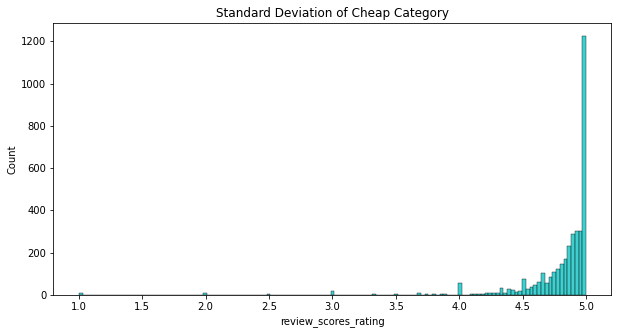

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= analysis1[analysis1["Category"] == 'Cheap'], x= 'review_scores_rating',color = 'c') 
plt.title('Standard Deviation of Cheap Category')
plt.show()

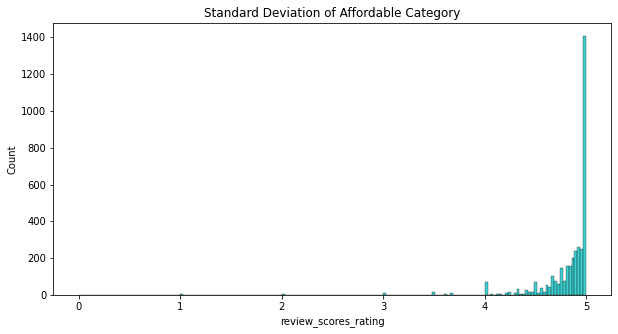

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= analysis1[analysis1["Category"] == 'Affordable'], x= 'review_scores_rating',color = 'c') 
plt.title('Standard Deviation of Affordable Category')
plt.show()

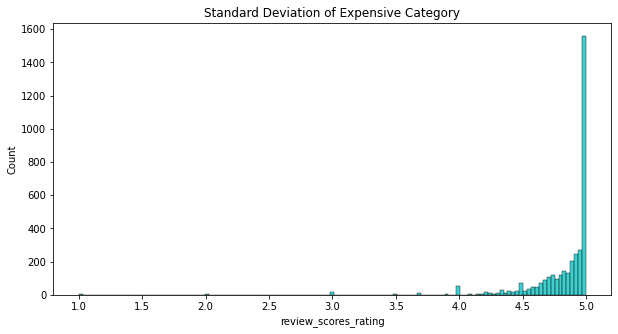

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= analysis1[analysis1["Category"] == 'Expensive'], x= 'review_scores_rating',color = 'c') 
plt.title('Standard Deviation of Expensive Category')
plt.show()

In [ ]:
analysis1[analysis1["Category"] == 'Very Cheap'].describe()

,average_price,review_scores_rating,reviews_per_month
count,3586.000000,3586.000000,3586.000000
mean,75.077072,4.758854,1.535270
std,24.156019,0.456938,1.839881
min,0.000000,1.000000,0.010000
25%,55.063699,4.710000,0.260000
50%,77.068493,4.900000,0.820000
75%,96.424658,5.000000,2.110000
max,114.000000,5.000000,14.640000


In [ ]:
analysis1[analysis1["Category"] == 'Cheap'].describe()

,average_price,review_scores_rating,reviews_per_month
count,3682.000000,3682.000000,3682.000000
mean,151.531879,4.810858,1.978775
std,22.474872,0.352897,1.879732
min,114.016438,1.000000,0.010000
25%,131.289041,4.770000,0.560000
50%,150.053425,4.910000,1.480000
75%,170.687671,5.000000,2.867500
max,191.000000,5.000000,16.580000


In [ ]:
analysis1[analysis1["Category"] == 'Affordable'].describe()

,average_price,review_scores_rating,reviews_per_month
count,3640.000000,3640.000000,3640.000000
mean,247.126513,4.821313,1.755398
std,37.897143,0.333800,1.646107
min,191.049315,0.000000,0.010000
25%,212.839726,4.780000,0.510000
50%,244.152055,4.930000,1.270000
75%,279.220548,5.000000,2.590000
max,323.000000,5.000000,24.990000


In [ ]:
analysis1[analysis1["Category"] == 'Expensive'].describe()

,average_price,review_scores_rating,reviews_per_month
count,3662.000000,3662.000000,3662.00000
mean,1209.666709,4.823132,1.54080
std,2168.103670,0.321994,1.73739
min,323.005479,1.000000,0.01000
25%,394.458904,4.760000,0.41000
50%,520.773973,4.930000,1.11000
75%,897.982192,5.000000,2.11000
max,10000.000000,5.000000,35.18000


In [ ]:
std = analysis1.groupby('Category').std()
std.reset_index(inplace=True)
std = std.sort_values('review_scores_rating',ascending=False)
std

,Category,average_price,review_scores_rating,reviews_per_month
3,Very Cheap,24.156019,0.456938,1.839881
1,Cheap,22.474872,0.352897,1.879732
0,Affordable,37.897143,0.333800,1.646107
2,Expensive,2168.103670,0.321994,1.737390


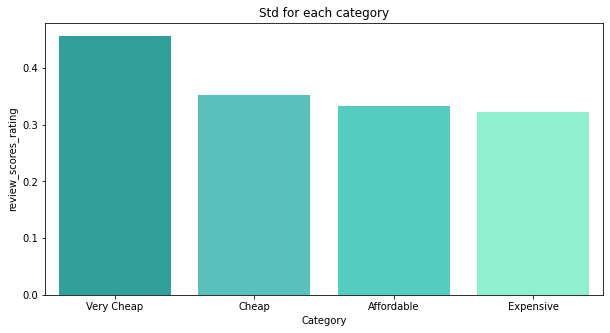

In [ ]:
Pallete = {'Very Cheap': 'lightseagreen', 'Cheap' : 'mediumturquoise', 'Affordable': 'turquoise', "Expensive": "aquamarine"}
plt.figure(figsize=(10,5))
sns.barplot(data= std, x ='Category', y= 'review_scores_rating', palette=Pallete) 
plt.title('Std for each category')
plt.show()


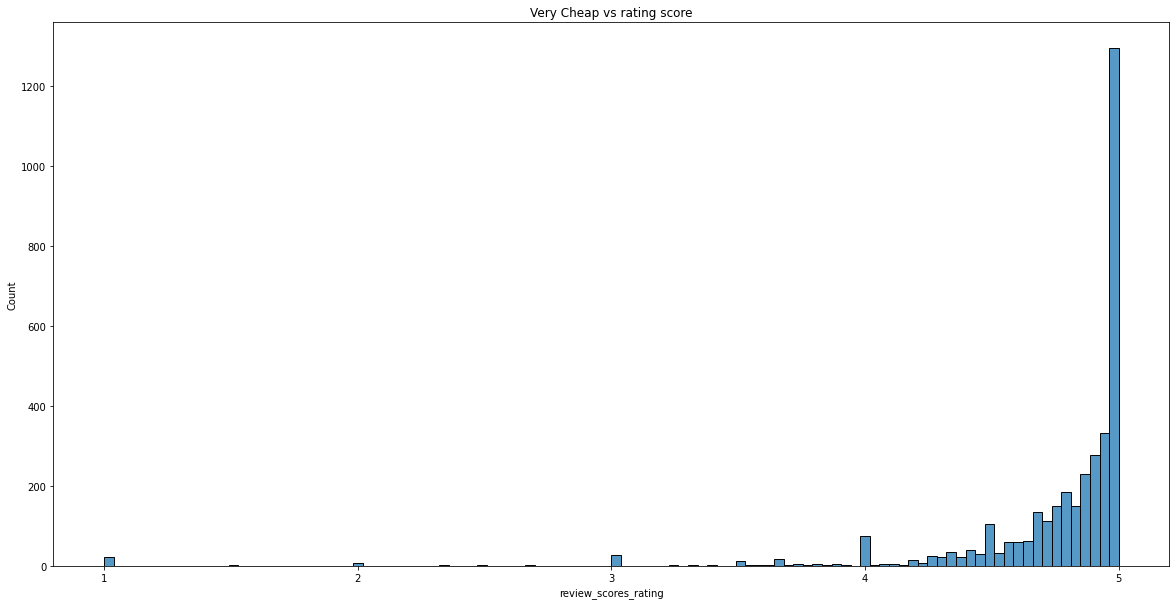

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=analysis1[analysis1['Category']=='Very Cheap'], x = 'review_scores_rating')
plt.xticks(np.arange(1,6,step=1))
plt.title('Very Cheap vs rating score')
plt.show()

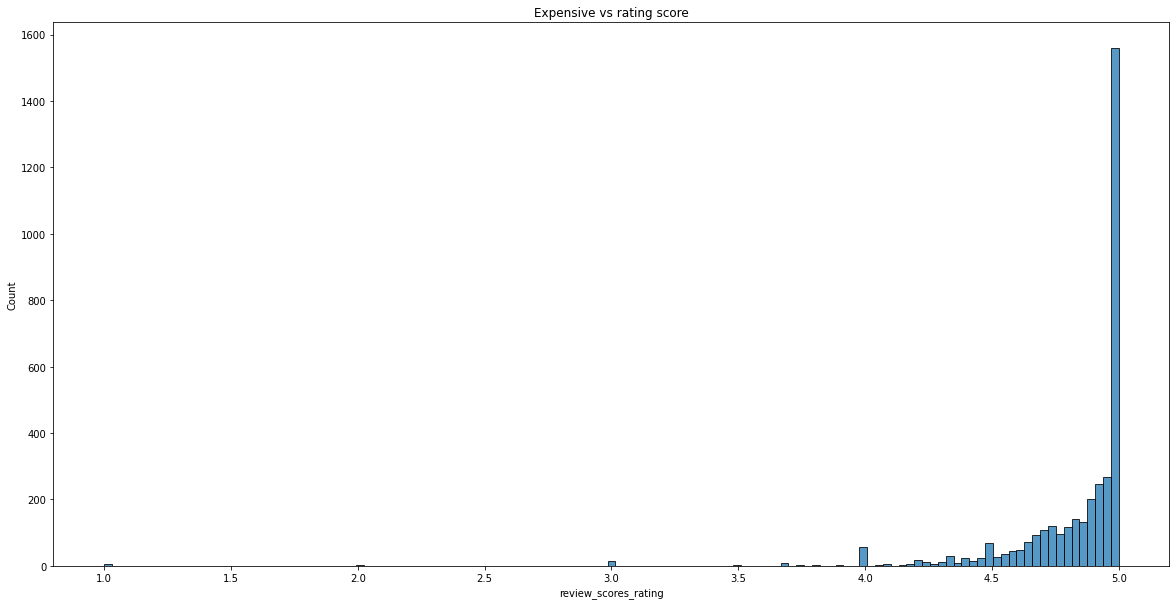

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=analysis1[analysis1['Category']=='Expensive'], x = 'review_scores_rating')
plt.title('Expensive vs rating score')
plt.show()

#####**CONCLUSION: High std suggests that there is a spread in rating score from 1 to 5 and vice versa. In other words, as the prices goes up, there is a higher chance of customer getting higher quality airbnbs and vice versa.**

#***How to know which cheap airbnbs that have good quality so that we can rent?***

##What factor affects the price of (cheap) Airbnb? What factor defines a good quality Airbnb among the cheap Airbnbs?

###Filtering the cheap and quality airbnbs

In [ ]:
Processed_data.loc[Processed_data['average_price']<=114,"Category"] = "Very Cheap"
Processed_data.loc[(Processed_data['average_price']<= 191) & (Processed_data['average_price'] >114), "Category"] = "Cheap"
Processed_data.loc[(Processed_data['average_price']<= 323) & (Processed_data['average_price'] >191), "Category"] = "Affordable"
Processed_data.loc[Processed_data['average_price']> 323,"Category"] = "Expensive"
Cheap_filtered = Processed_data[Processed_data['Category'] == 'Very Cheap']
Cheap_filtered

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,average_price,Category
1095,664013,2022-09-12,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,4.83,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap
1096,664013,2022-09-13,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,4.83,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap
1097,664013,2022-09-14,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,4.83,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap
1098,664013,2022-09-15,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,4.83,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap
1099,664013,2022-09-16,f,89.0,$89.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,4.83,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690454,304866,2023-09-08,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,4.81,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap
6690455,304866,2023-09-09,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,4.81,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap
6690456,304866,2023-09-10,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,4.81,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap
6690457,304866,2023-09-11,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,4.81,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap


Rating scores

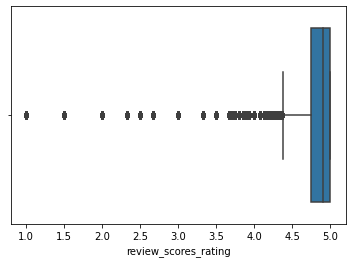

In [ ]:
sns.boxplot(data=Cheap_filtered, x = 'review_scores_rating')

In [ ]:
Cheap_filtered['review_scores_rating'].describe()

count    842420.000000
mean          4.801655
std           0.380253
min           1.000000
25%           4.750000
50%           4.910000
75%           5.000000
max           5.000000
Name: review_scores_rating, dtype: float64

Reviews per month

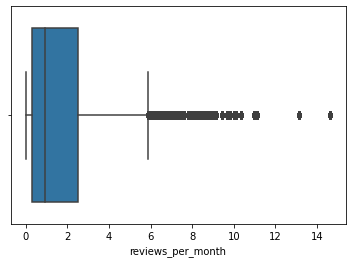

In [ ]:
sns.boxplot(data=Cheap_filtered, x = 'reviews_per_month')

In [ ]:
Cheap_filtered['reviews_per_month'].describe()

count    842420.000000
mean          1.680347
std           1.933822
min           0.010000
25%           0.280000
50%           0.910000
75%           2.520000
max          14.640000
Name: reviews_per_month, dtype: float64

In [ ]:
Cheap_filtered.loc[(Cheap_filtered['review_scores_rating']<4.75) | (Cheap_filtered['reviews_per_month'] < 2.52),"Quality"] = "Bad"
Cheap_filtered.loc[(Cheap_filtered['review_scores_rating']>=4.75) & (Cheap_filtered['reviews_per_month'] >=2.52),"Quality"] = "Good"
Cheap_filtered.drop_duplicates(inplace=True)
Cheap_filtered

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,average_price,Category,Quality
1095,664013,2022-09-12,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1096,664013,2022-09-13,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1097,664013,2022-09-14,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1098,664013,2022-09-15,f,79.0,$79.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1099,664013,2022-09-16,f,89.0,$89.00,2.0,1125.0,"Austin, Texas, United States",30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690454,304866,2023-09-08,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad
6690455,304866,2023-09-09,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad
6690456,304866,2023-09-10,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad
6690457,304866,2023-09-11,t,89.0,$89.00,3.0,7.0,"Austin, Texas, United States",30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad


###1/Location vs Quality (listing_id stay constant and average_price stay constant)

In [ ]:
Cheap_filtered['neighbourhood'] = Cheap_filtered['neighbourhood'].str.replace(', Texas, United States',"")
Cheap_filtered

<ipython-input-166-1c3327854b53>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,neighbourhood,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,average_price,Category,Quality
1095,664013,2022-09-12,f,79.0,$79.00,2.0,1125.0,Austin,30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1096,664013,2022-09-13,f,79.0,$79.00,2.0,1125.0,Austin,30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1097,664013,2022-09-14,f,79.0,$79.00,2.0,1125.0,Austin,30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1098,664013,2022-09-15,f,79.0,$79.00,2.0,1125.0,Austin,30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
1099,664013,2022-09-16,f,89.0,$89.00,2.0,1125.0,Austin,30.34998,-97.85608,...,4.87,4.76,4.97,4.94,4.89,4.88,1.58,81.849315,Very Cheap,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690454,304866,2023-09-08,t,89.0,$89.00,3.0,7.0,Austin,30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad
6690455,304866,2023-09-09,t,89.0,$89.00,3.0,7.0,Austin,30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad
6690456,304866,2023-09-10,t,89.0,$89.00,3.0,7.0,Austin,30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad
6690457,304866,2023-09-11,t,89.0,$89.00,3.0,7.0,Austin,30.20943,-97.77117,...,4.80,4.71,4.89,4.85,4.78,4.80,1.31,91.619178,Very Cheap,Bad


In [ ]:
analysis3 = Cheap_filtered[['listing_id','neighbourhood','Quality','longitude','latitude']]
analysis3.drop_duplicates(inplace=True)
analysis3

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,neighbourhood,Quality,longitude,latitude
1095,664013,Austin,Bad,-97.85608,30.34998
2920,676107,Austin,Bad,-97.80159,30.15374
3285,676959,Austin,Good,-97.80261,30.15391
5110,692220,Austin,Bad,-97.75171,30.23537
10950,714922,Austin,Bad,-97.76325,30.24103
...,...,...,...,...,...
6681334,202187,Austin,Good,-97.74678,30.24867
6685714,240541,Austin,Bad,-97.72587,30.25424
6688634,282342,Austin,Bad,-97.70780,30.36774
6689729,304808,Austin,Good,-97.72690,30.27330


In [ ]:
analysis3['neighbourhood'].unique()

array(['Austin', 'Lakeway', 'Austin, Tx, United States', 'Del Valle',
       'Buda', 'Kyle', 'Bastrop', 'Marble Falls', 'Elgin', 'Round Rock',
       'Georgetown', 'Manor', 'Pflugerville', 'Cedar Park', 'Kingsbury',
       'Johnson City', 'Dripping Springs', 'San Marcos', 'Spicewood',
       'Lago Vista', 'Bertram', 'Liberty Hill', 'Cedar Creek', 'Lockhart',
       'Leander', 'Burnet', 'New Braunfels', 'Rosanky', 'Smithville',
       'Seguin', 'Bluffton', 'Prairie Lea', 'Hays County',
       'Bastrop County', 'Fentress', 'Niederwald', 'Wimberley', 'Hutto',
       'Martindale', 'Manchaca', 'Travis County', 'Coupland', 'Kingsland',
       'Fischer', 'Andice', 'Driftwood', 'Jonestown', 'Webberville',
       'Manor, Austin', 'Point Venture'], dtype=object)

In [ ]:
analysis3["Count"] = analysis3.groupby("neighbourhood")["listing_id"].transform("count")
top5 = analysis3.sort_values('Count',ascending=False)
top5 = top5.set_index('neighbourhood').loc['Austin':'Kingsbury']
top5 = top5.reset_index()
top5

<ipython-input-169-a1d35750e070>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,neighbourhood,listing_id,Quality,longitude,latitude,Count
0,Austin,664013,Bad,-97.856080,30.349980,1711
1,Austin,49798374,Bad,-97.749140,30.444050,1711
2,Austin,49757262,Bad,-97.723160,30.255090,1711
3,Austin,49735076,Bad,-97.736877,30.227541,1711
4,Austin,49714998,Good,-97.773094,30.216847,1711
...,...,...,...,...,...,...
1917,Kingsbury,54034958,Bad,-97.762640,29.726400,41
1918,Kingsbury,54034945,Bad,-97.763520,29.727240,41
1919,Kingsbury,52652619,Bad,-97.762810,29.726816,41
1920,Kingsbury,573059656195311767,Bad,-97.762590,29.728870,41


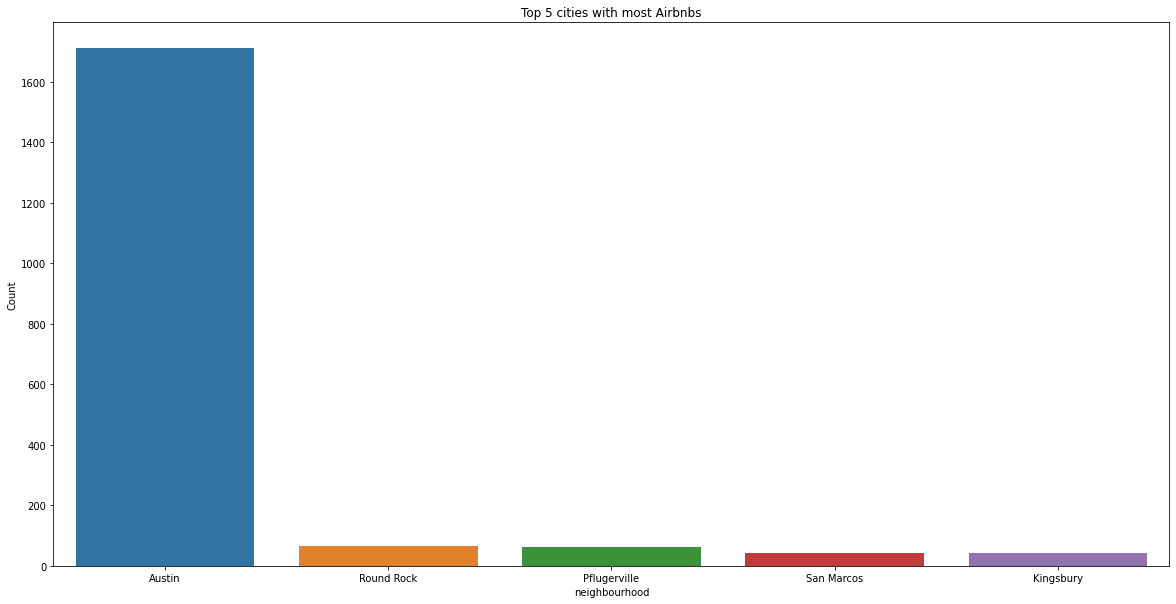

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=top5, x = 'neighbourhood', y = 'Count') 
plt.title('Top 5 cities with most Airbnbs')
plt.show()

#####Here is map of 5 cities with the most airbnbs

Using Plotly.Express

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/texas.geojson') as response:
    countiesborders = json.load(response) 

In [ ]:
fig = px.scatter_geo(top5, lat='latitude', lon = 'longitude',geojson= countiesborders)
fig.update_layout(title= '5 places with the most Airbnbs',title_x=1)
fig.show()


Using GeoDataFrame

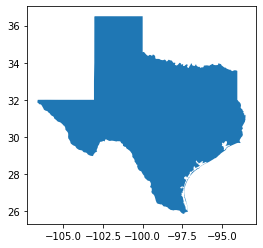

In [ ]:
data = gpd.read_file("https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/texas.geojson")
data.to_crs(epsg=4326).plot()

In [ ]:
top5_mean = top5.groupby('neighbourhood').mean()
top5_mean

,listing_id,longitude,latitude,Count
neighbourhood,,,,
Austin,6.704001e+16,-97.742483,30.282831,1711.0
Kingsbury,3.507606e+17,-97.770769,29.733511,41.0
Pflugerville,2.143120e+17,-97.615875,30.444696,63.0
Round Rock,8.938834e+16,-97.652078,30.521917,64.0
San Marcos,1.363829e+17,-97.975768,29.896300,43.0


In [ ]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(top5_mean['longitude'], top5_mean['latitude'])]
geo_df = gpd.GeoDataFrame(top5_mean, 
                          crs = crs, 
                          geometry = geometry).reset_index()
geo_df.head()

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,neighbourhood,listing_id,longitude,latitude,Count,geometry
0,Austin,6.704001e+16,-97.742483,30.282831,1711.0,POINT (-97.74248 30.28283)
1,Kingsbury,3.507606e+17,-97.770769,29.733511,41.0,POINT (-97.77077 29.73351)
2,Pflugerville,2.143120e+17,-97.615875,30.444696,63.0,POINT (-97.61587 30.44470)
3,Round Rock,8.938834e+16,-97.652078,30.521917,64.0,POINT (-97.65208 30.52192)
4,San Marcos,1.363829e+17,-97.975768,29.896300,43.0,POINT (-97.97577 29.89630)


Text(0.5, 1.0, 'Top 5 neighbourhoods with most Airbnbs')

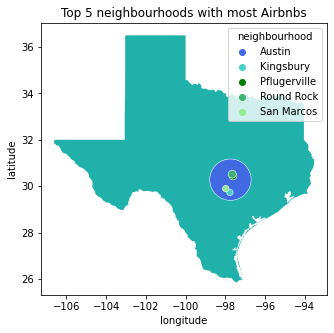

In [ ]:
palette1 = {"Austin": 'royalblue', 'Kingsbury': 'mediumturquoise', 'Pflugerville': 'green', 'Round Rock': 'mediumseagreen', 'San Marcos': 'lightgreen'}
fig, ax = plt.subplots(figsize = (10,5))
data.to_crs(epsg=4326).plot(ax=ax, color='lightseagreen')
sns.scatterplot(ax=ax, x=geo_df['longitude'], y=geo_df['latitude'],s = geo_df['Count'], cmap = 'autumn', hue=geo_df['neighbourhood'], palette=palette1)
ax.set_title('Top 5 neighbourhoods with most Airbnbs')



```
geometry = [Point(xy) for xy in zip(analysis3['longitude'], analysis3['latitude'])]
gdf = GeoDataFrame(analysis3,geometry = geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15,15)),marker='o', color= 'red', markersize=15)```



#####**Austin, which is the state capital of Texas, has the most Airbnb. However, this doesn't indicate that it has the best quality airbnbs.**

####Finding Good quality over total ratio.

In [ ]:
analysis3 = Cheap_filtered[['listing_id','neighbourhood','Quality','longitude','latitude']]
analysis3.drop_duplicates(inplace=True)
analysis3

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,neighbourhood,Quality,longitude,latitude
1095,664013,Austin,Bad,-97.85608,30.34998
2920,676107,Austin,Bad,-97.80159,30.15374
3285,676959,Austin,Good,-97.80261,30.15391
5110,692220,Austin,Bad,-97.75171,30.23537
10950,714922,Austin,Bad,-97.76325,30.24103
...,...,...,...,...,...
6681334,202187,Austin,Good,-97.74678,30.24867
6685714,240541,Austin,Bad,-97.72587,30.25424
6688634,282342,Austin,Bad,-97.70780,30.36774
6689729,304808,Austin,Good,-97.72690,30.27330


In [ ]:
GoodQuality = analysis3[analysis3['Quality']=='Good'].groupby('neighbourhood')['Quality'].count().sort_values(ascending=False)
GoodQuality = GoodQuality.reset_index()
GoodQuality = GoodQuality.rename({'Quality': 'HowManyGood'},axis = 'columns')
GoodQuality

,neighbourhood,HowManyGood
0,Austin,266
1,Cedar Park,18
2,San Marcos,17
3,Round Rock,17
4,Dripping Springs,14
5,Georgetown,14
6,Pflugerville,8
7,Leander,7
8,Johnson City,6
9,Manor,5


In [ ]:
Total = analysis3.groupby('neighbourhood')['Quality'].count().sort_values(ascending=False)
Total = Total.reset_index()
Total = Total.rename({'Quality': 'Total'},axis = 'columns')
Total

,neighbourhood,Total
0,Austin,1711
1,Round Rock,64
2,Pflugerville,63
3,San Marcos,43
4,Kingsbury,41
5,Cedar Park,40
6,Manor,34
7,Georgetown,30
8,Kyle,27
9,Dripping Springs,24


In [ ]:
analysis3 = analysis3.join(GoodQuality.set_index('neighbourhood'),on ='neighbourhood')
analysis3 = analysis3.join(Total.set_index('neighbourhood'),on ='neighbourhood')
analysis3.dropna(inplace=True)
analysis3.isna().sum()

listing_id       0
neighbourhood    0
Quality          0
longitude        0
latitude         0
HowManyGood      0
Total            0
dtype: int64

In [ ]:
analysis3["Good over Total"] = analysis3['HowManyGood'] / analysis3['Total']
analysis3.drop(columns=['Quality'], inplace= True)
analysis3

,listing_id,neighbourhood,longitude,latitude,HowManyGood,Total,Good over Total
1095,664013,Austin,-97.85608,30.34998,266.0,1711,0.155465
2920,676107,Austin,-97.80159,30.15374,266.0,1711,0.155465
3285,676959,Austin,-97.80261,30.15391,266.0,1711,0.155465
5110,692220,Austin,-97.75171,30.23537,266.0,1711,0.155465
10950,714922,Austin,-97.76325,30.24103,266.0,1711,0.155465
...,...,...,...,...,...,...,...
6681334,202187,Austin,-97.74678,30.24867,266.0,1711,0.155465
6685714,240541,Austin,-97.72587,30.25424,266.0,1711,0.155465
6688634,282342,Austin,-97.70780,30.36774,266.0,1711,0.155465
6689729,304808,Austin,-97.72690,30.27330,266.0,1711,0.155465


In [ ]:
analysis3

,listing_id,neighbourhood,longitude,latitude,HowManyGood,Total,Good over Total
1095,664013,Austin,-97.85608,30.34998,266.0,1711,0.155465
2920,676107,Austin,-97.80159,30.15374,266.0,1711,0.155465
3285,676959,Austin,-97.80261,30.15391,266.0,1711,0.155465
5110,692220,Austin,-97.75171,30.23537,266.0,1711,0.155465
10950,714922,Austin,-97.76325,30.24103,266.0,1711,0.155465
...,...,...,...,...,...,...,...
6681334,202187,Austin,-97.74678,30.24867,266.0,1711,0.155465
6685714,240541,Austin,-97.72587,30.25424,266.0,1711,0.155465
6688634,282342,Austin,-97.70780,30.36774,266.0,1711,0.155465
6689729,304808,Austin,-97.72690,30.27330,266.0,1711,0.155465


In [ ]:
top10quality = analysis3.sort_values("Good over Total",ascending=False)
top10quality.set_index('neighbourhood').loc['Prairie Lea':'Austin']
top10quality1 = top10quality.reset_index()
top10quality1 = top10quality1[['neighbourhood','Good over Total']]
top10quality1.drop_duplicates(inplace=True)
top10quality1 = top10quality1.reset_index()
top10quality1

,index,neighbourhood,Good over Total
0,0,Prairie Lea,1.000000
1,1,Bastrop County,1.000000
2,2,Seguin,1.000000
3,3,Niederwald,1.000000
4,4,Jonestown,1.000000
5,5,Rosanky,1.000000
6,6,Dripping Springs,0.583333
7,30,Driftwood,0.500000
8,34,Travis County,0.500000
9,35,Hays County,0.500000


Top 10 different cities with good quality Airbnbs

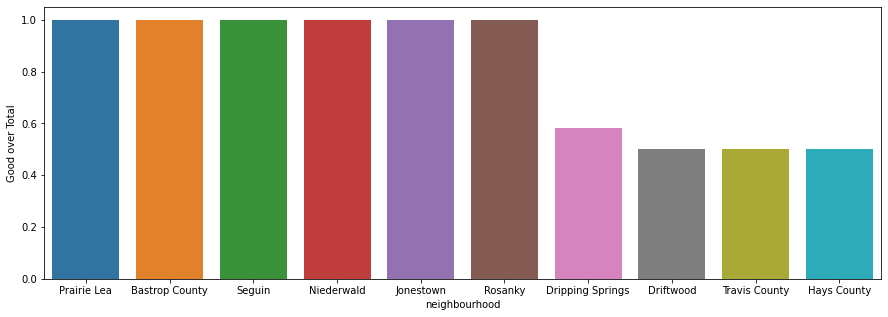

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=top10quality1.head(10), x = 'neighbourhood', y = 'Good over Total')
plt.show()

Top good quality Airbnbs in these 10 cities

#####**CONCLUSION: Places like Rosanky and Seguin, even though they're not major cities, have only a few but good quality airbnbs. Another thing is that most of these cities are located to the south of Austin.**

In [ ]:

plt.figure()
fig1 = px.scatter_geo(top10quality.head(2077), lat='latitude', lon = 'longitude', color= 'neighbourhood', hover_name = 'neighbourhood',scope = 'usa')
fig1.update_layout(title= 'Top 10 good qualities Airbnbs',title_x=1)
fig1.show()
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
top10quality['neighbourhood'].unique()

array(['Prairie Lea', 'Bastrop County', 'Seguin', 'Niederwald',
       'Jonestown', 'Rosanky', 'Dripping Springs', 'Driftwood',
       'Travis County', 'Hays County', 'Liberty Hill', 'Bertram',
       'Georgetown', 'Cedar Park', 'Elgin', 'Johnson City', 'San Marcos',
       'Leander', 'Cedar Creek', 'Spicewood', 'Martindale', 'Burnet',
       'Lago Vista', 'Manchaca', 'Bastrop', 'Wimberley', 'Round Rock',
       'Buda', 'New Braunfels', 'Kingsland', 'Lakeway', 'Austin', 'Hutto',
       'Marble Falls', 'Kyle', 'Manor', 'Pflugerville', 'Lockhart',
       'Del Valle'], dtype=object)

In [ ]:
map_draw = top10quality.set_index('neighbourhood').head(38)
map_draw = map_draw.reset_index()
map_draw

,neighbourhood,listing_id,longitude,latitude,HowManyGood,Total,Good over Total
0,Prairie Lea,26133350,-97.75402,29.729190,1.0,1,1.000000
1,Bastrop County,24277451,-97.58437,30.112560,1.0,1,1.000000
2,Seguin,49809681,-97.96496,29.743170,1.0,1,1.000000
3,Niederwald,653093564988511103,-97.80071,30.029290,1.0,1,1.000000
4,Jonestown,641491098688907546,-97.92335,30.483720,1.0,1,1.000000
5,Rosanky,548525713314972019,-97.33387,29.948631,1.0,1,1.000000
6,Dripping Springs,29851418,-98.09358,30.292080,14.0,24,0.583333
7,Dripping Springs,46581763,-98.09297,30.294310,14.0,24,0.583333
8,Dripping Springs,11604252,-98.11230,30.219400,14.0,24,0.583333
9,Dripping Springs,611454222805027513,-98.08959,30.295930,14.0,24,0.583333


In [ ]:
map_draw = map_draw.groupby('neighbourhood').mean()
map_draw

,listing_id,longitude,latitude,HowManyGood,Total,Good over Total
neighbourhood,,,,,,
Bastrop County,2.427745e+07,-97.584370,30.112560,1.0,1.0,1.000000
Driftwood,1.530542e+17,-98.035178,30.091015,2.0,4.0,0.500000
Dripping Springs,7.827763e+16,-98.096677,30.276161,14.0,24.0,0.583333
Hays County,3.446440e+17,-97.809155,30.025295,1.0,2.0,0.500000
Jonestown,6.414911e+17,-97.923350,30.483720,1.0,1.0,1.000000
Niederwald,6.530936e+17,-97.800710,30.029290,1.0,1.0,1.000000
Prairie Lea,2.613335e+07,-97.754020,29.729190,1.0,1.0,1.000000
Rosanky,5.485257e+17,-97.333870,29.948631,1.0,1.0,1.000000
Seguin,4.980968e+07,-97.964960,29.743170,1.0,1.0,1.000000


In [ ]:
crs = {'init':'EPSG:4326'}
geometry1 = [Point(xy) for xy in zip(map_draw ['longitude'], map_draw ['latitude'])]
geo1 = gpd.GeoDataFrame(map_draw , 
                          crs = crs, 
                          geometry = geometry1).reset_index()
geo1

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,neighbourhood,listing_id,longitude,latitude,HowManyGood,Total,Good over Total,geometry
0,Bastrop County,2.427745e+07,-97.584370,30.112560,1.0,1.0,1.000000,POINT (-97.58437 30.11256)
1,Driftwood,1.530542e+17,-98.035178,30.091015,2.0,4.0,0.500000,POINT (-98.03518 30.09101)
2,Dripping Springs,7.827763e+16,-98.096677,30.276161,14.0,24.0,0.583333,POINT (-98.09668 30.27616)
3,Hays County,3.446440e+17,-97.809155,30.025295,1.0,2.0,0.500000,POINT (-97.80916 30.02529)
4,Jonestown,6.414911e+17,-97.923350,30.483720,1.0,1.0,1.000000,POINT (-97.92335 30.48372)
5,Niederwald,6.530936e+17,-97.800710,30.029290,1.0,1.0,1.000000,POINT (-97.80071 30.02929)
6,Prairie Lea,2.613335e+07,-97.754020,29.729190,1.0,1.0,1.000000,POINT (-97.75402 29.72919)
7,Rosanky,5.485257e+17,-97.333870,29.948631,1.0,1.0,1.000000,POINT (-97.33387 29.94863)
8,Seguin,4.980968e+07,-97.964960,29.743170,1.0,1.0,1.000000,POINT (-97.96496 29.74317)
9,Travis County,3.936959e+07,-97.535160,30.361165,1.0,2.0,0.500000,POINT (-97.53516 30.36116)


Text(0.5, 1.0, 'Quality Neighbourhood ranking')

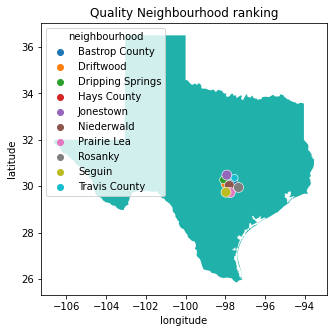

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
data.to_crs(epsg=4326).plot(ax=ax, color='lightseagreen')
sns.scatterplot(ax=ax, x=geo1['longitude'], y=geo1['latitude'], s = geo1['Good over Total']*100, cmap = 'autumn', hue=geo1['neighbourhood'])
ax.set_title('Quality Neighbourhood ranking')

###2/Date vs Price (Good quality must remain constant) 

When do people rent the most? Covid, holiday, etc?

In [ ]:
analysis2 = Cheap_filtered[Cheap_filtered['Quality'] == 'Good'][['listing_id', 'date','price']]
analysis2

,listing_id,date,price
3285,676959,2022-09-13,49.0
3286,676959,2022-09-14,49.0
3287,676959,2022-09-15,49.0
3288,676959,2022-09-16,49.0
3289,676959,2022-09-17,49.0
...,...,...,...
6690089,304808,2023-09-08,99.0
6690090,304808,2023-09-09,99.0
6690091,304808,2023-09-10,74.0
6690092,304808,2023-09-11,74.0


In [ ]:
analysis2[analysis2['listing_id']==304808].describe()

,listing_id,price
count,365.0,365.000000
mean,304808.0,83.364384
std,0.0,18.543425
min,304808.0,74.000000
25%,304808.0,74.000000
50%,304808.0,74.000000
75%,304808.0,99.000000
max,304808.0,188.000000


In [ ]:
airbnb1 = analysis2[analysis2['listing_id']== 304808]
airbnb1

,listing_id,date,price
6689729,304808,2022-09-13,74.0
6689730,304808,2022-09-14,74.0
6689731,304808,2022-09-15,74.0
6689732,304808,2022-09-16,99.0
6689733,304808,2022-09-17,99.0
...,...,...,...
6690089,304808,2023-09-08,99.0
6690090,304808,2023-09-09,99.0
6690091,304808,2023-09-10,74.0
6690092,304808,2023-09-11,74.0


In [ ]:
airbnb1['price'] = airbnb1['price']/airbnb1['price'].mean()
airbnb1

<ipython-input-194-b67bc5b415e5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,date,price
6689729,304808,2022-09-13,0.887669
6689730,304808,2022-09-14,0.887669
6689731,304808,2022-09-15,0.887669
6689732,304808,2022-09-16,1.187558
6689733,304808,2022-09-17,1.187558
...,...,...,...
6690089,304808,2023-09-08,1.187558
6690090,304808,2023-09-09,1.187558
6690091,304808,2023-09-10,0.887669
6690092,304808,2023-09-11,0.887669


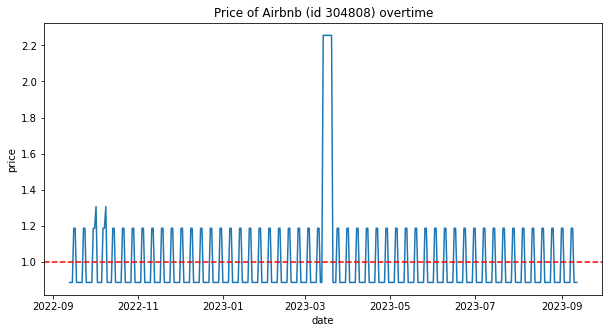

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=airbnb1, x = 'date', y = 'price')
plt.title('Price of Airbnb (id 304808) overtime')
plt.axhline(1,color='red',linestyle='--')
plt.show()

**1.0 means the base price. Anything greater than 1.0 means a increase price and vice versa. So from this graph of Airbmn with the id 664013, I can conclude that the price relative to that week is lower during the weekdays than during the weekends.**

In [ ]:
analysis2['listing_id'].unique()

array([            676959,             883802,             917823,
                  1880094,            1906190,            2318394,
                  2336368,            2349236,            2349447,
                  4227044,            5869022,            5873238,
                  7859914,            8170048,            8480556,
                 10576585,           10707904,           11325599,
                 11330408,           12434404,           12765604,
                 13128065,           13571814,           14785881,
                 14979866,           15095434,           15485824,
                 16633368,           16710494,           17103933,
                 17177301,           17239710,           17540790,
                 17546604,           17586259,           17636413,
                 17650728,           18269784,           18613534,
                 18834915,           19488978,           19496423,
                 19497035,           19547270,           19547

In [ ]:
analysis2[analysis2['listing_id']==42437285].describe()

,listing_id,price
count,365.0,365.000000
mean,42437285.0,66.972603
std,0.0,16.932942
min,42437285.0,49.000000
25%,42437285.0,65.000000
50%,42437285.0,65.000000
75%,42437285.0,66.000000
max,42437285.0,199.000000


In [ ]:
airbnb2 = analysis2[analysis2['listing_id']==883802]
airbnb2['price'].mean()

82.64931506849315

In [ ]:
airbnb2['price'] = airbnb2['price']/airbnb2['price'].mean()
airbnb2

<ipython-input-199-5f145e77f7f3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,date,price
27740,883802,2022-09-13,0.725959
27741,883802,2022-09-14,0.725959
27742,883802,2022-09-15,0.907449
27743,883802,2022-09-16,1.149435
27744,883802,2022-09-17,1.149435
...,...,...,...
28100,883802,2023-09-08,1.149435
28101,883802,2023-09-09,1.149435
28102,883802,2023-09-10,0.907449
28103,883802,2023-09-11,0.907449


In [ ]:
airbnb3 = analysis2[analysis2['listing_id']==50767556]
airbnb3['price'].mean()

71.82739726027397

In [ ]:
airbnb3['price'] = airbnb3['price']/airbnb3['price'].mean()
airbnb3

<ipython-input-201-d0a6b6b42c0b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,date,price
5790002,50767556,2022-09-13,0.334134
5790003,50767556,2022-09-14,0.361979
5790004,50767556,2022-09-15,0.598657
5790005,50767556,2022-09-16,0.960636
5790006,50767556,2022-09-17,0.988481
...,...,...,...
5790362,50767556,2023-09-08,1.002403
5790363,50767556,2023-09-09,1.002403
5790364,50767556,2023-09-10,0.863180
5790365,50767556,2023-09-11,0.863180


In [ ]:
airbnb4 = analysis2[analysis2['listing_id']==40750053]
airbnb4['price'].mean()

83.24383561643836

In [ ]:
airbnb4['price'] = airbnb4['price']/airbnb4['price'].mean()
airbnb4

<ipython-input-203-b1e469971bab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,listing_id,date,price
5768832,40750053,2022-09-13,0.900968
5768833,40750053,2022-09-14,0.900968
5768834,40750053,2022-09-15,1.261355
5768835,40750053,2022-09-16,1.681806
5768836,40750053,2022-09-17,1.681806
...,...,...,...
5769192,40750053,2023-09-08,1.045122
5769193,40750053,2023-09-09,1.045122
5769194,40750053,2023-09-10,1.033110
5769195,40750053,2023-09-11,1.021097


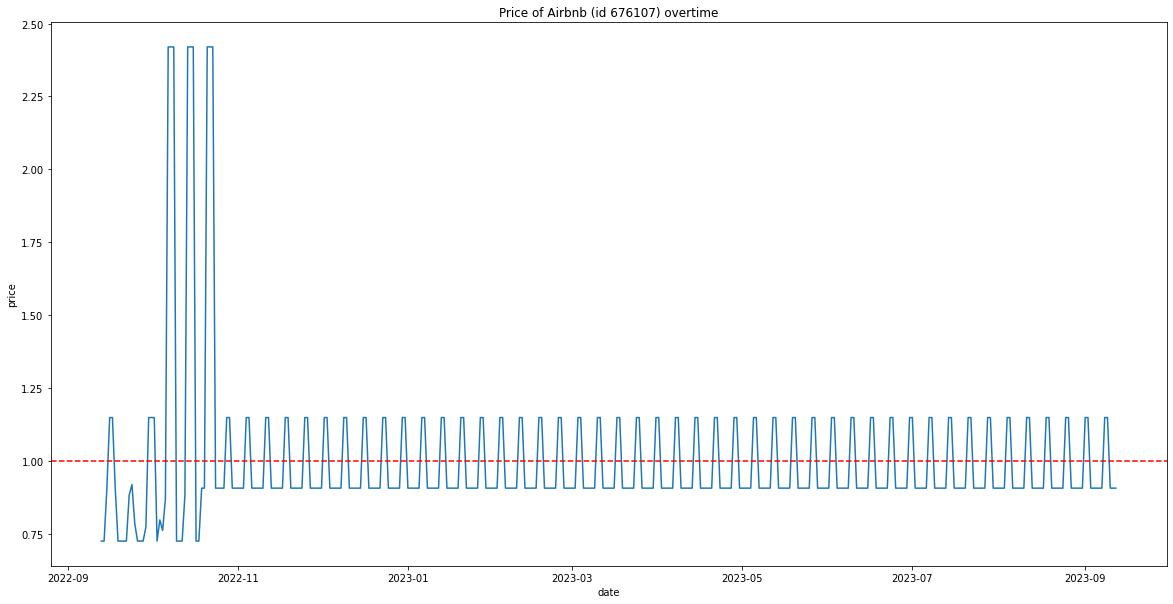

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=airbnb2, x = 'date', y = 'price')
plt.title('Price of Airbnb (id 676107) overtime')
plt.axhline(1,color='red',linestyle='--')
plt.show()

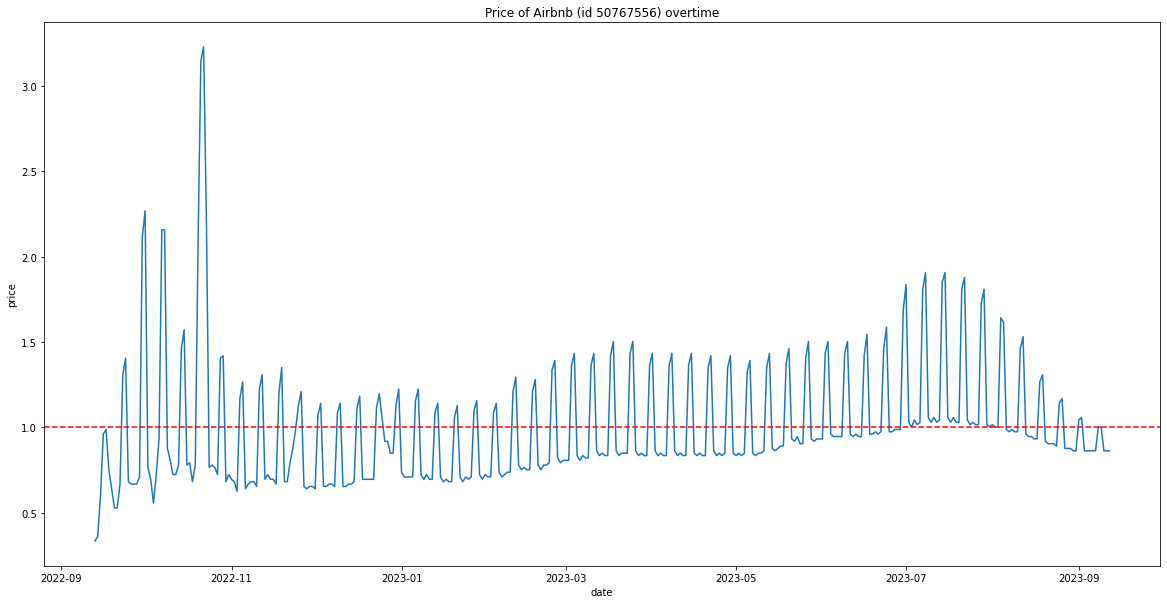

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=airbnb3, x = 'date', y = 'price')
plt.title('Price of Airbnb (id 50767556) overtime')
plt.axhline(1,color='red',linestyle='--')
plt.show()

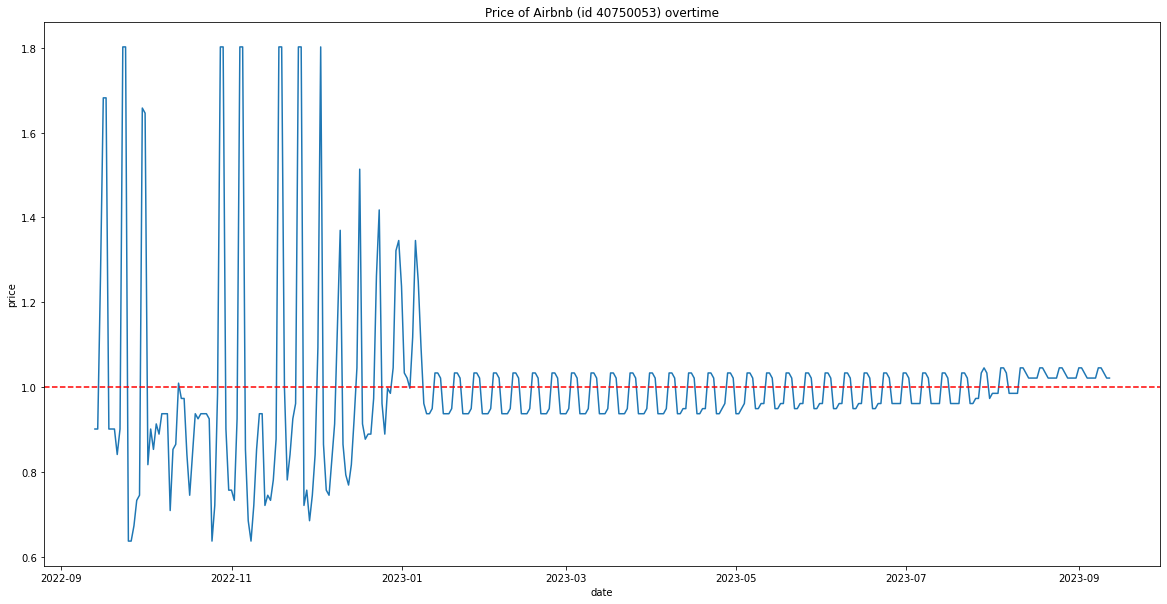

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=airbnb4, x = 'date', y = 'price')
plt.title('Price of Airbnb (id 40750053) overtime')
plt.axhline(1,color='red',linestyle='--')
plt.show()

**This graphs also proves similar pattern where price goes up and down regularly.** 

####Putting time of year into days of weeks to confirm

664013

In [ ]:
airbnb1['day'] = airbnb1['date'].dt.strftime("%d") 
airbnb1['day'] = airbnb1['day'].astype('float')
airbnb2['day'] = airbnb2['date'].dt.strftime("%d") 
airbnb2['day'] = airbnb2['day'].astype('float')
airbnb3['day'] = airbnb3['date'].dt.strftime("%d") 
airbnb3['day'] = airbnb3['day'].astype('float')
airbnb4['day'] = airbnb4['date'].dt.strftime("%d") 
airbnb4['day'] = airbnb4['day'].astype('float')

<ipython-input-207-cc96853e8234>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-207-cc96853e8234>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-207-cc96853e8234>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-207-cc9

In [ ]:
def daysinweek(x):
  if x['day'] %7 == 1:
    return 'S'
  if x['day'] %7 == 2:
    return 'M'
  if x['day'] %7 == 3:
    return 'Tues'
  if x['day'] %7 == 4:
    return 'Wed'
  if x['day']%7 == 5:
    return 'Thur'
  if x['day']%7 == 6:
    return 'Fri'
  if x['day']%7 == 0:
    return 'Sat'
airbnb1['day'] = airbnb1.apply(daysinweek,axis=1)
airbnb2['day'] = airbnb2.apply(daysinweek,axis=1)
airbnb3['day'] = airbnb3.apply(daysinweek,axis=1)
airbnb4['day'] = airbnb4.apply(daysinweek,axis=1)

<ipython-input-208-18aeade44fbc>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-208-18aeade44fbc>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-208-18aeade44fbc>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-208-

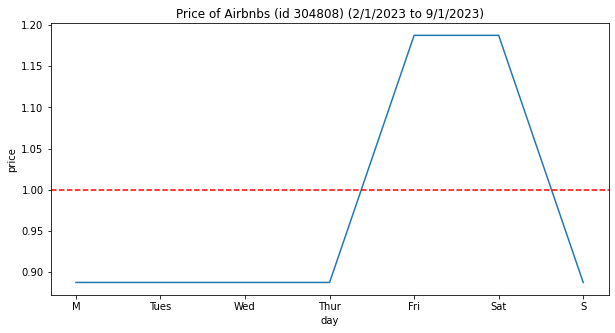

In [ ]:
new= airbnb1.set_index('date').loc['2023-01-02':'2023-01-09']
plt.figure(figsize=(10,5))
sns.lineplot(data=new, y= 'price', x = 'day')
plt.axhline(1,color='red',linestyle='--')
plt.title('Price of Airbnbs (id 304808) (2/1/2023 to 9/1/2023)')
plt.show()

#####**CONCLUSION: 2023-01-02 will be Monday and we can see that the price is below 1.0, meaning lower than the base price. This line has zero slop until 2023-01-05, which is Thursday. From this, we can conclude that price tends to be much cheaper from Sunday to Thursday.**

676107

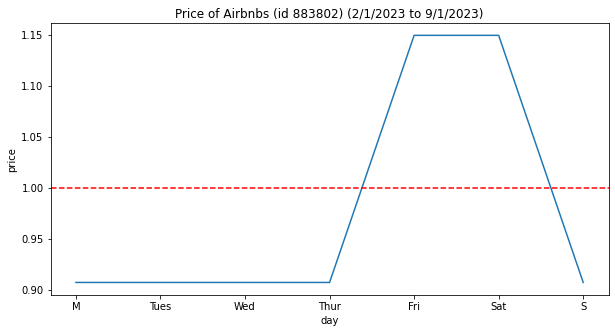

In [ ]:
new2= airbnb2.set_index('date').loc['2023-01-02':'2023-01-09']
plt.figure(figsize=(10,5))
sns.lineplot(data=new2, y= 'price', x = 'day')
plt.axhline(1,color='red',linestyle='--')
plt.title('Price of Airbnbs (id 883802) (2/1/2023 to 9/1/2023)')
plt.show()

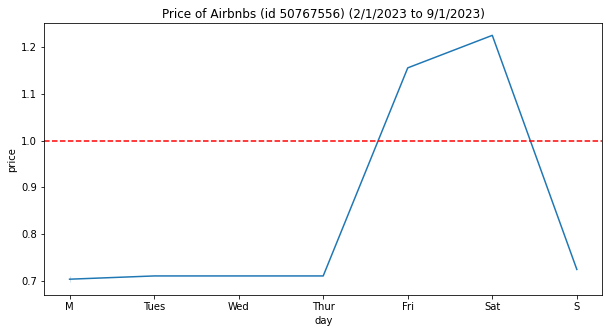

In [ ]:
new3= airbnb3.set_index('date').loc['2023-01-02':'2023-01-09']
plt.figure(figsize=(10,5))
sns.lineplot(data=new3, y= 'price', x = 'day')
plt.axhline(1,color='red',linestyle='--')
plt.title('Price of Airbnbs (id 50767556) (2/1/2023 to 9/1/2023)')
plt.show()

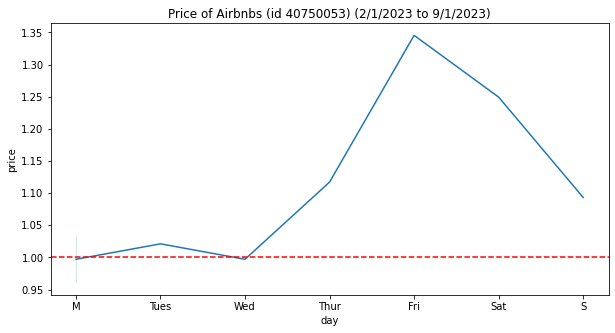

In [ ]:
new4= airbnb4.set_index('date').loc['2023-01-02':'2023-01-09']
plt.figure(figsize=(10,5))
sns.lineplot(data=new4, y= 'price', x = 'day')
plt.axhline(1,color='red',linestyle='--')
plt.title('Price of Airbnbs (id 40750053) (2/1/2023 to 9/1/2023)')
plt.show()

**There is a similar occurence in Airbnb with ID 676107,50767556, and **

#####CONCLUSION: weekdays are cheaper than weekends. Something to consider when renting cheap Airbnb 

###3/ Time vs Availability

In [ ]:
analysis4 = Cheap_filtered[['listing_id','date','available']]
analysis4

,listing_id,date,available
1095,664013,2022-09-12,f
1096,664013,2022-09-13,f
1097,664013,2022-09-14,f
1098,664013,2022-09-15,f
1099,664013,2022-09-16,f
...,...,...,...
6690454,304866,2023-09-08,t
6690455,304866,2023-09-09,t
6690456,304866,2023-09-10,t
6690457,304866,2023-09-11,t


In [ ]:
analysis4['listing_id'].unique()

array([664013, 676107, 676959, ..., 282342, 304808, 304866])

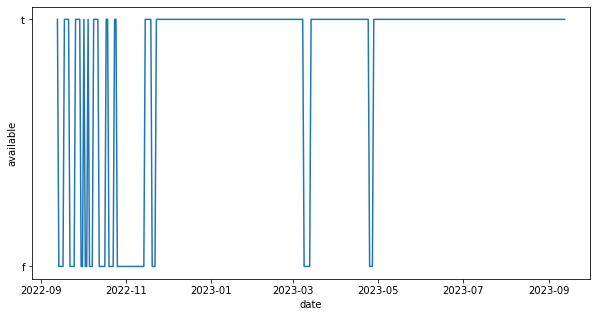

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=analysis4[analysis4['listing_id'] == 304808], x = 'date', y = 'available')
plt.show()

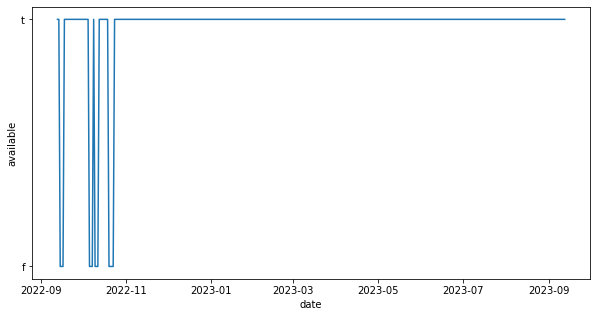

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=analysis4[analysis4['listing_id'] == 304866	], x = 'date', y = 'available')
plt.show()